<p align="center">
  <img src="https://github.com/wisupai/e2m/blob/main/docs/images/wisup_e2m_banner.jpg?raw=true" width="100%" alt="wisup_e2m Logo">
</p>


# 👏🏻欢迎使用E2M(Everything2Markdown)👏🏻

## 📖简介

E2M是一个将各种内容转换为Markdown格式的工具，支持多种输入格式:

-  文本
    -   doc
    -   docx
    -   epub
    -   html
    -   htm
    -   pdf (特别说明:包括纯文本、文本+图片、纯图片形式的pdf文件)
    -   ppt
    -   pptx
-   链接
    -   url
-   音频
    -   mp3
    -   m4a
- 视频
    -  mp4 (未完成)


## 🚀快速上手

### 🔧安装

```bash
pip install wisup_e2m
```

## 核心功能1: 解析器

解析器（Parser）的目的是将各类文件解析为文本或者图片。因为大模型的输入主要以文本和图片为主，所以解析器是在运行转换器（Converter）前的预处理步骤。

解析后返回的数据格式为 E2MParsedData:

```python
class E2MParsedData(BaseModel):
    text: Optional[str] = Field(None, description="Parsed text")
    images: Optional[List[str]] = Field([], description="Parsed image paths")
    attached_images: Optional[List[str]] = Field(
        [], description="Attached image paths, like 1_0.png, 1_1.png, etc."
    )
    attached_images_map: Optional[Dict[str, List[str]]] = Field(
        {},
        description="Attached image paths map, like {1.png: ['/path/to/1_0.png'], 2.png: [/path/to/2_1.png]}, only available for layout detection.",
    )
    metadata: Optional[List[Any] | Dict[str, Any]] = Field(
        {}, description="Metadata of the parsed data, including engine, etc."
    )
```

### URL 解析器

In [1]:
from wisup_e2m import UrlParser

url = "https://www.osar.fr/notes/justintonation"
parser = UrlParser(engine="jina") # url engines: jina

In [2]:
url_data = parser.parse(url)
print(url_data.text)

100%|██████████| 1/1 [00:01<00:00,  1.39s/it]

Title: What I Learned Writing an Album in Just Intonation

URL Source: https://www.osar.fr/notes/justintonation

Markdown Content:
Pierre Cusa <pierre@osar.fr>  
August 2024 [(history)](https://github.com/pac-dev/notes/commits/master/content/justintonation.md)  
in [osar.fr](https://www.osar.fr/) / notes

**Just intonation (JI)** today falls under the umbrella of microtonal music, because it involves playing "between the notes" of the 12-tone scale we're used to. As I type microtonal, my spellchecker decorates it with a sad squiggle, confirming I've drifted (again) into a topic that's not even in its dictionary. But JI is often described as _the way music should naturally sound_. So which one is it, an obscure deviation from the norm, or an ideal we should return to?

This post contains all the notes I want to keep after writing [an album](https://www.cusamusic.com/album/walk/) in JI, specifically using a very uncompromising method called freestyle JI. The album itself isn't the focus 

### PDF 解析器

In [4]:
# 使用marker引擎会从huggingface hub下载模型，并使用模型进行解析
# 如果遇到网络问题，尝试运行以下代码

import os
os.environ['CURL_CA_BUNDLE'] = ''
os.environ['HF_ENDPOINT']= 'https://hf-mirror.com'

In [5]:
from wisup_e2m import PdfParser

pdf_path = "./test.pdf"
parser = PdfParser(engine="marker") # pdf engines: marker, unstructured, surya_layout 

Loaded detection model vikp/surya_det3 on device mps with dtype torch.float16
Loaded detection model vikp/surya_layout3 on device mps with dtype torch.float16
Loaded reading order model vikp/surya_order on device mps with dtype torch.float16
Loaded recognition model vikp/surya_rec on device mps with dtype torch.float16


/Users/zephyr/anaconda3/envs/e2m/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loaded texify model to mps with torch.float16 dtype


/Users/zephyr/anaconda3/envs/e2m/lib/python3.10/site-packages/transformers/models/auto/image_processing_auto.py:513: FutureWarning: The image_processor_class argument is deprecated and will be removed in v4.42. Please use `slow_image_processor_class`, or `fast_image_processor_class` instead
  warnings.warn(


In [6]:
pdf_data = parser.parse(pdf_path) # 默认会在 ./figure 文件夹下生成图片，可通过参数修改

Finding reading order: 100%|██████████| 2/2 [00:24<00:00, 12.37s/it]


In [7]:
print(pdf_data.text)

# Attention Is All You Need

| Ashish Vaswani∗ Google Brain   |                                                 |
|--------------------------------|-------------------------------------------------|
| avaswani@google.com            | Noam Shazeer∗ Google Brain                      |
| noam@google.com                | Niki Parmar∗                                    |
| Google Research                |                                                 |
| nikip@google.com               | Jakob Uszkoreit∗ Google Research usz@google.com |

| Llion Jones∗            |                                         |
|-------------------------|-----------------------------------------|
| Google Research         |                                         |
| llion@google.com        | Aidan N. Gomez∗ † University of Toronto |
| aidan@cs.toronto.edu    | Łukasz Kaiser∗ Google Brain             |
| lukaszkaiser@google.com |                                         |

Illia Polosukhin∗ ‡
illia.polosukhin@gm

### PPT 解析器

如果需要解析PPT、DOC文件，则需要下载`libreoffice`依赖，具体安装方法如下：

#### Mac
    
```bash
brew install libreoffice
```

#### Linux

```bash
sudo apt-get install libreoffice
```

#### Windows

进入官网 https://www.libreoffice.org/ 下载

In [1]:
from wisup_e2m import PptParser

ppt_path = "./test.ppt"
parser = PptParser(engine="unstructured") # pdf engines: unstructured

In [2]:
ppt_data = parser.parse(ppt_path) # 默认会在 ./figure 文件夹下生成图片，可通过参数修改

In [3]:
print(ppt_data.text)

# Application example: 
![](figures/17_5.png)
![](figures/17_4.png)
![](figures/17_3.png)
![](figures/17_2.png)
![](figures/17_1.png)
![](figures/17_0.png)
![](figures/5_1.jpg)
![](figures/5_0.jpg)
![](figures/1_0.jpg)
# Photo OCR
# Problem description and pipeline
# Machine Learning
# The Photo OCR problem
![](figures/2_4.jpg)
![](figures/2_3.png)
![](figures/2_2.png)
![](figures/2_1.png)
![](figures/2_0.png)
# LULA B’s ANTIQUE MALL
# LULA B’s
# OPEN
# LULA B’s
# Photo OCR pipeline
![](figures/16_0.jpg)
![](figures/4_0.jpg)
# 1. Text detection
# 2. Character segmentation
# 3. Character classification
# A
# T
# N
# Photo OCR pipeline
# Character segmentation
# Character recognition
![](figures/18_0.png)
# Image
# Text detection
![](figures/14_12.png)
![](figures/14_11.png)
![](figures/14_10.png)
![](figures/14_9.png)
![](figures/14_8.png)
![](figures/14_7.png)
![](figures/14_6.png)
![](figures/14_5.png)
![](figures/14_4.png)
![](figures/14_3.png)
![](figures/14_2.png)
![](figures/14_1.

### DOCX 解析器

In [1]:
from wisup_e2m import DocxParser

docx_path = "./test.docx"
parser = DocxParser(engine="unstructured") # pdf engines: unstructured

In [2]:
docx_data = parser.parse(docx_path) # 默认会在 ./figure 文件夹下生成图片，可通过参数修改

In [3]:
print(docx_data.text)

McKinsey 7S OER
The McKinsey 7S framework is a valuable tool used by organizations to ensure their company is operating optimally under a variety of circumstances. Developed by the McKinsey consulting company in the 1980s, the tool sought to promote an alignment of seven key parameters as a means for maximizing the likelihood of company success. These parameters, dubbed the “7 S’s”, are all interconnected within the framework, which each “S” being as important as the next. This interconnectedness also outlines a key component of the framework – a change in one parameter necessitates a change in all of the others in order to maintain alignment and ensure company success. The model is particularly useful when re-evaluating a company’s organizational structure and strategy after a large change (ex: a merger, change in management, rapid expansion etc.). Such changes will likely cause a large shift in at least one of the 7 “S” components. It is therefore useful to use the McKinsey 7S model 

## 核心功能2: 转换器

转换器（Converter）的目的是在解析成功后。将文本或图片进行转换，目前支持通过各类模型`engine`引擎转换成Markdown。

目前仅支持`litellm`，后续会支持更多引擎，可前往Litellm官网查看支持的模型:

https://docs.litellm.ai/docs/providers/

### 文本转换器

In [4]:
from wisup_e2m import TextConverter

text_converter = TextConverter(
    engine="litellm",
    api_key="sk-3fcab9239d41475a8252873f02687454",
    model="deepseek/deepseek-chat",
    caching=True,
    cache_type="disk-cache",
)

raw_text = docx_data.text

✨ 目前转换器仅支持默认策略
在 `default` 默认策略下，大模型会先判断**文本类型**和**文本格式**，在进行接龙式的转换，以保证Markdown文本生成的连续性。

In [5]:
markdown_text = text_converter.convert(raw_text) # 默认  strategy = "default"

推断结果：

文本类型：商业分析报告/案例研究

文本格式：
- 一级标题: **McKinsey 7S OER**
- 二级标题: **Applying Mckinsey 7s to Coca Cola**
- 三级标题: **The First Order: A Case Study**
- 四级标题: **Using McKinsey 7s to Evaluate the First Order**
- 小标题（不符合结构）: **Hard S’s**, **Soft S’s**, **Management**, **Rank and File Employees**, **Activity:**

解释：
- 文本主要讨论了McKinsey 7S框架在不同组织中的应用，包括Coca Cola和The First Order的案例研究，因此推断为商业分析报告或案例研究。
- 文本中的标题结构遵循了一级到四级的层次结构，但部分小标题如“Hard S’s”和“Soft S’s”等不符合标准结构，因此采用加粗方式标记。None**McKinsey 7S OER**

The McKinsey 7S framework is a valuable tool used by organizations to ensure their company is operating optimally under a variety of circumstances. Developed by the McKinsey consulting company in the 1980s, the tool sought to promote an alignment of seven key parameters as a means for maximizing the likelihood of company success. These parameters, dubbed the “7 S’s”, are all interconnected within the framework, with each “S” being as important as the next. This interconnectedness also outlines a key comp

In [6]:
print(markdown_text)

**McKinsey 7S OER**

The McKinsey 7S framework is a valuable tool used by organizations to ensure their company is operating optimally under a variety of circumstances. Developed by the McKinsey consulting company in the 1980s, the tool sought to promote an alignment of seven key parameters as a means for maximizing the likelihood of company success. These parameters, dubbed the “7 S’s”, are all interconnected within the framework, with each “S” being as important as the next. This interconnectedness also outlines a key component of the framework – a change in one parameter necessitates a change in all of the others in order to maintain alignment and ensure company success. The model is particularly useful when re-evaluating a company’s organizational structure and strategy after a large change (ex: a merger, change in management, rapid expansion etc.). Such changes will likely cause a large shift in at least one of the 7 “S” components. It is therefore useful to use the McKinsey 7S mo

### 图片转换器

图片转换器(`ImageConverter`)通过多模态大模型进行识别，可配合`PdfParser`的`surya_layout`引擎进行更细致的图片识别。

以layout为后缀的布局识别引擎不会产生text，其核心是识别图片中的布局，然后截出无法被转换为文本的图片，并标识在图片上。

In [1]:
import os
from wisup_e2m import PdfParser, ImageConverter

work_dir = os.getcwd()
image_dir = os.path.join(work_dir, "figure")

test_surya_layout_pdf = "./test_surya_layout_pdf.pdf"

# 加载解析器
pdf_parser = PdfParser(engine="surya_layout")

image_converter = ImageConverter(
    engine="litellm",
    api_key="<you api key>",
    model="gpt-4o",
    base_url="<you base url>",
    caching=True,
    cache_type="disk-cache",
)

/Users/zephyr/anaconda3/envs/e2m/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 解析PDF为图片
test_surya_layout_pdf_data = pdf_parser.parse(
    test_surya_layout_pdf,
    start_page=0,
    end_page=20,
    work_dir=work_dir,
    image_dir=image_dir, # 提取的图片保存的地方
    relative_path=True, # 图片路径是否为相对路径(相对于work_dir)
)

In [3]:
test_surya_layout_pdf_data.to_dict()

{'text': '',
 'images': ['/Users/zephyr/Desktop/Wisup/code/wisup_project/e2m/figure/0.png',
  '/Users/zephyr/Desktop/Wisup/code/wisup_project/e2m/figure/1.png',
  '/Users/zephyr/Desktop/Wisup/code/wisup_project/e2m/figure/2.png',
  '/Users/zephyr/Desktop/Wisup/code/wisup_project/e2m/figure/3.png',
  '/Users/zephyr/Desktop/Wisup/code/wisup_project/e2m/figure/4.png',
  '/Users/zephyr/Desktop/Wisup/code/wisup_project/e2m/figure/5.png',
  '/Users/zephyr/Desktop/Wisup/code/wisup_project/e2m/figure/6.png',
  '/Users/zephyr/Desktop/Wisup/code/wisup_project/e2m/figure/7.png',
  '/Users/zephyr/Desktop/Wisup/code/wisup_project/e2m/figure/8.png',
  '/Users/zephyr/Desktop/Wisup/code/wisup_project/e2m/figure/9.png',
  '/Users/zephyr/Desktop/Wisup/code/wisup_project/e2m/figure/10.png',
  '/Users/zephyr/Desktop/Wisup/code/wisup_project/e2m/figure/11.png',
  '/Users/zephyr/Desktop/Wisup/code/wisup_project/e2m/figure/12.png',
  '/Users/zephyr/Desktop/Wisup/code/wisup_project/e2m/figure/13.png',
  '/Use

In [4]:
test_surya_layout_pdf_data.to_dict().keys()

dict_keys(['text', 'images', 'attached_images', 'attached_images_map', 'metadata'])

/Users/zephyr/Desktop/Wisup/code/wisup_project/e2m/figure/16.png


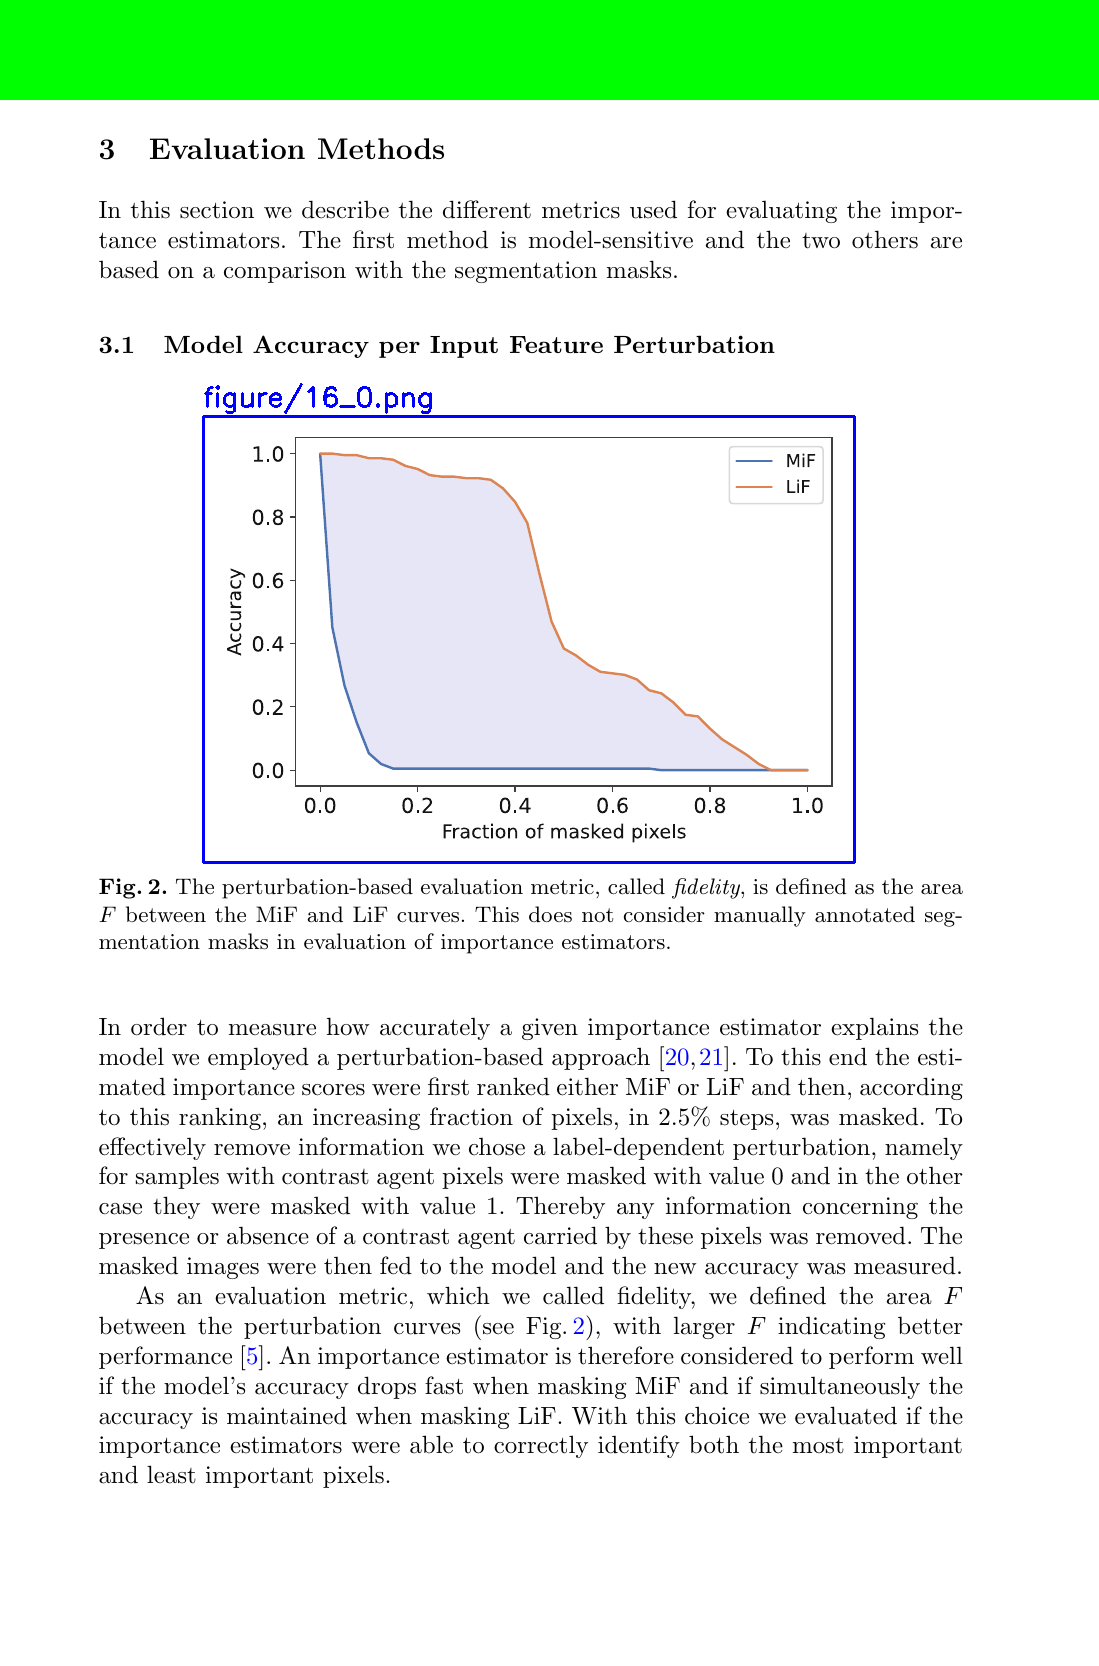

In [5]:
# 让我们看看 images 的部分
# 你会发现页眉部分被遮盖了，并且图片部分被正确识别出来了
from IPython.display import Image, display

image_16 = test_surya_layout_pdf_data.images[16]
print(image_16)

display(Image(image_16))


In [6]:
# 通过 ImageConverter 将图片转换为文本

image_text = image_converter.convert(
    images = test_surya_layout_pdf_data.images,
    attached_images_map= test_surya_layout_pdf_data.attached_images_map,
    work_dir=work_dir, # 图片在Markdown中的地址会相对于 workdir，默认是绝对路径
)

### 文本类型
本书籍属于学术论文集或会议论文集 ("workshop proceedings"). 

### 文本格式
- 书籍封面和内页说明书籍的标题、编辑和出版信息，常见于学术出版物。
- 目录显示了清晰的章节和专题分类, 用蓝色字体区分了主体内容。

### 标题格式
1. 封面
   - **书名**: Explainable and Transparent AI and Multi-Agent Systems
   - **会议信息**: 4th International Workshop, EXTRAAAMAS 2022
   - **编辑信息**: Davide Calvaresi, Amro Najjar, Michael Winikoff, Kary Främling
   - **出版商**: Springer
2. 版权页面
   - **版权声明和 ISBN 编号**: ISSN, ISBN, DOI 链接
3. 前言
   - 标题: **Preface**
4. 组织机构
   - 标题: **Organization**
   - 各职位和成员: General Chairs, Special Track Chairs, Publicity Chairs, Advisory Board, Program Committee

5. 目录
   - 一级标题: 
     - Explainable Machine Learning
     - Explainable Neuro-Symbolic AI
     - Explainable Agents
     - XAI Measures and Metrics
     - AI and Law
   - 内容的细分显示了文章标题和页码。

示例：
- 一级标题
  ```
  # Explainable Machine Learning
  ## Evaluation of Importance Estimators in Deep Learning Classifiers for Computed Tomography
  # Explainable Neuro-Symbolic AI
  ## Recent Neural-Symbolic Approaches to

In [7]:
# save Lecture Notes in Artificial Intelligence
with open("Lecture Notes in Artificial Intelligence.md", "w") as f:
    f.write(image_text)